In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import confusion_matrix, classification_report,roc_auc_score, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split,cross_val_score,KFold
import matplotlib.pyplot as plt
import os 
from sklearn.metrics import roc_curve, auc

chose_data = 'full_data_withoud_pro_oder.csv'
#chose_data = 'significant_data_05.csv'


In [2]:
data = pd.read_csv(chose_data)
total_data =  len(data.index)
print('the number of sample:',total_data)
#adata = data.drop(['Unnamed: 0', 'Latitude', 'Longitude', 'Sales', 'Late_delivery_risk'], axis = 1)
data.keys()

the number of sample: 180519


Index(['Unnamed: 0', 'Benefit per order', 'Sales per customer', 'Latitude',
       'Longitude', 'Order Item Discount', 'Category Id',
       'Order Item Discount Rate', 'Order Item Product Price',
       'Order Item Profit Ratio', 'Order Item Quantity', 'Sales',
       'Order Item Total', 'Late_delivery_risk', 'order_weekday',
       'shipping_weekday', 'time_delta', 'market_int', 'shipping_mode_int',
       'type', 'Sales per customerlog'],
      dtype='object')

In [3]:
x_train,x_test,y_train,y_test = train_test_split(data.drop(['Late_delivery_risk'], axis = 1).values,data['Late_delivery_risk'].values,test_size = 0.3)

RandomFores

In [4]:

#from sklearn import preprocessing

#x_train  = preprocessing.normalize(x_train)
#x_test  = preprocessing.normalize(x_test)

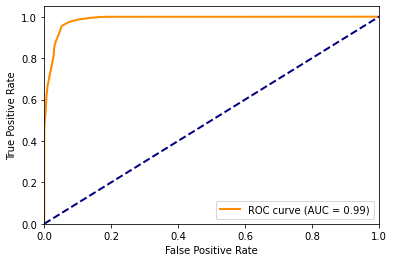

In [5]:
rf = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=50, max_features='sqrt',
                       min_samples_leaf=2, min_samples_split=5,
                       min_weight_fraction_leaf=0.01, n_estimators=100,
                       verbose=0, warm_start=True)
model = rf.fit(x_train, y_train)
# Train a Random Forest classifier
#model = RandomForestClassifier()
#model.fit(x_train, y_train)

# Predict probabilities for the test set
y_prob = model.predict_proba(x_test)[:, 1]

# Compute the false positive rate (FPR), true positive rate (TPR), and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Compute the area under the ROC curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
#plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

mức độ quan trọng của feature: [1.54428695e-02 2.55098075e-04 2.84046929e-04 1.46874467e-03
 1.51676034e-03 2.07584710e-04 5.95878204e-04 1.05226073e-04
 2.81994360e-04 1.38165582e-04 3.51676898e-04 2.25033113e-04
 2.62222043e-04 6.03363594e-03 3.46697470e-03 5.70420243e-01
 1.27609374e-04 3.88241217e-01 1.02998576e-02 2.75162407e-04]
feature quan trọng nhất: time_delta


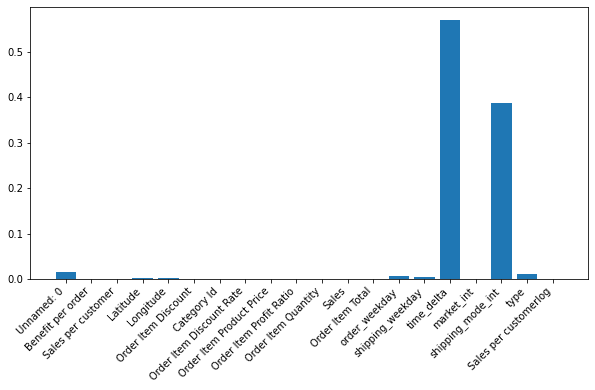

In [6]:
# biểu thị mức độ quan trọng của feature, cao nhất ứng vs quan trọng nhất 
plt.figure(figsize=(10,5))
print('mức độ quan trọng của feature:', rf.feature_importances_)
plt.bar(list(data.drop('Late_delivery_risk', axis = 1).keys()),rf.feature_importances_)
# Xoay trục x
plt.xticks(rotation=45, ha='right')
print('feature quan trọng nhất:', list(data.drop('Late_delivery_risk', axis = 1).keys())[np.argmax(rf.feature_importances_)])

In [7]:
y_pred = model.predict(x_test)
cm = confusion_matrix(y_test,y_pred)
print(cm)
print(classification_report(y_test,y_pred))
print(roc_auc_score(y_test,y_pred))

[[21327  2972]
 [  260 29597]]
              precision    recall  f1-score   support

           0       0.99      0.88      0.93     24299
           1       0.91      0.99      0.95     29857

    accuracy                           0.94     54156
   macro avg       0.95      0.93      0.94     54156
weighted avg       0.94      0.94      0.94     54156

0.9344911321492979


<Figure size 432x288 with 0 Axes>

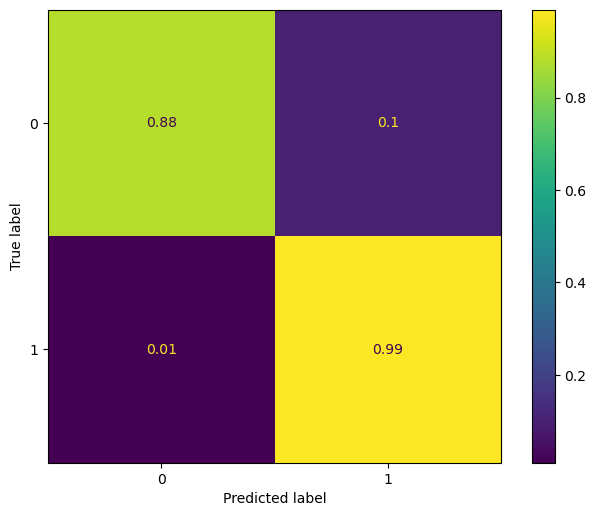

In [8]:
import numpy as np
#cm = np.asarray(cm)
cm = cm/cm.sum(axis=1)
for i in range(len(cm)):
    for j in range(len(cm)):
        cm[i][j] = round(cm[i][j],2)
        
plt.figure()
fig, ax = plt.subplots(figsize=(8,6), dpi=100)

# initialize using the raw 2D confusion matrix 
# and output labels (in our case, it's 0 and 1)
display = ConfusionMatrixDisplay(cm, display_labels=model.classes_)

# set the plot title using the axes object
#ax.set(title='Confusion Matrix for the Diabetes Detection Model')

# show the plot. 
# Pass the parameter ax to show customizations (ex. title) 
display.plot(ax=ax)
fig.savefig('confusion_matrix_RF_main.png')


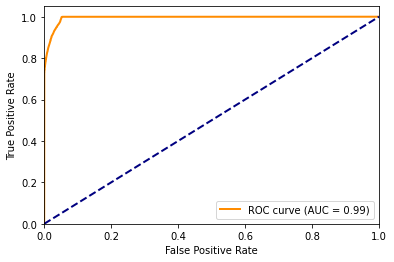

In [9]:
xgb = XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=0.1, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=1, monotone_constraints=None,
              n_estimators=140, n_jobs=4, nthread=4, num_parallel_tree=1,
              objective='binary:logistic', random_state=27, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, seed=27, subsample=0.8,
              tree_method=None, validate_parameters=False, verbosity=None)
model = xgb.fit(x_train,y_train)
# Predict probabilities for the test set
y_prob = model.predict_proba(x_test)[:, 1]

# Compute the false positive rate (FPR), true positive rate (TPR), and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Compute the area under the ROC curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
#plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [10]:
y_pred = model.predict(x_test)
cm = confusion_matrix(y_test,y_pred)
print(cm)
print(classification_report(y_test,y_pred))
print(roc_auc_score(y_test,y_pred))

[[23043  1256]
 [   94 29763]]
              precision    recall  f1-score   support

           0       1.00      0.95      0.97     24299
           1       0.96      1.00      0.98     29857

    accuracy                           0.98     54156
   macro avg       0.98      0.97      0.97     54156
weighted avg       0.98      0.98      0.98     54156

0.9725811448221997


<Figure size 432x288 with 0 Axes>

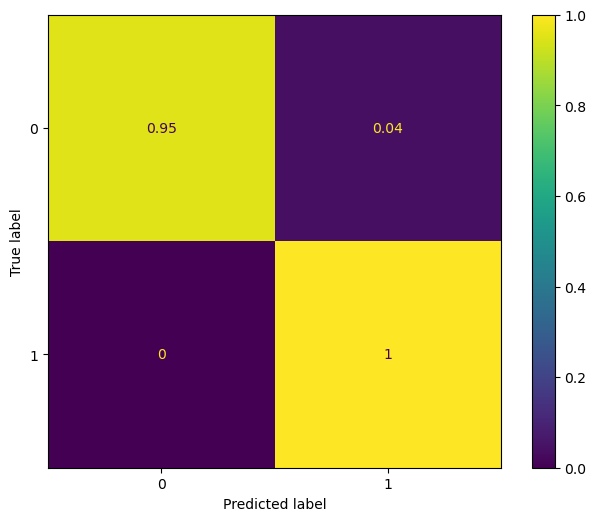

In [11]:
import numpy as np
#cm = np.asarray(cm)
cm = cm/cm.sum(axis=1)
for i in range(len(cm)):
    for j in range(len(cm)):
        cm[i][j] = round(cm[i][j],2)
        
plt.figure()
fig, ax = plt.subplots(figsize=(8,6), dpi=100)

# initialize using the raw 2D confusion matrix 
# and output labels (in our case, it's 0 and 1)
display = ConfusionMatrixDisplay(cm, display_labels=model.classes_)

# set the plot title using the axes object
#ax.set(title='Confusion Matrix for the Diabetes Detection Model')

# show the plot. 
# Pass the parameter ax to show customizations (ex. title) 
display.plot(ax=ax)
fig.savefig('confusion_matrix_XGB_main.png')


mức độ quan trọng của feature: [0.0101752  0.00139943 0.00171444 0.00266722 0.00231284 0.00148405
 0.00274889 0.00135834 0.00151629 0.0014651  0.00528339 0.00136185
 0.00119079 0.02094916 0.01321755 0.4077374  0.00183619 0.47509506
 0.04493672 0.00155001]
feature quan trọng nhất: shipping_mode_int


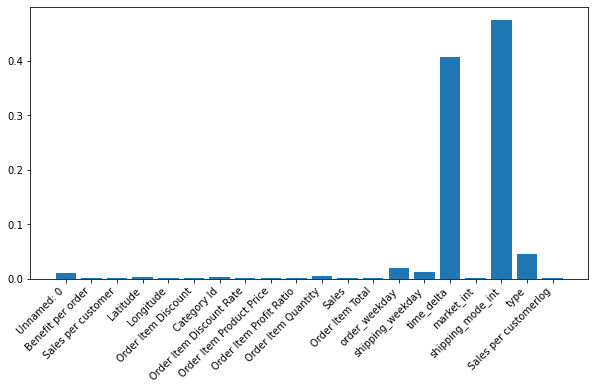

In [12]:
# biểu thị mức độ quan trọng của feature, cao nhất ứng vs quan trọng nhất 
plt.figure(figsize=(10,5))
print('mức độ quan trọng của feature:', xgb.feature_importances_)
plt.bar(list(data.drop('Late_delivery_risk', axis = 1).keys()),xgb.feature_importances_)
# Xoay trục x
plt.xticks(rotation=45, ha='right')
print('feature quan trọng nhất:', list(data.drop('Late_delivery_risk', axis = 1).keys())[np.argmax(xgb.feature_importances_)])

*logistic regression


In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
#lg = LogisticRegression(penalty='elasticnet', solver='saga', l1_ratio=0.5)
x_train,x_test,y_train,y_test = train_test_split(data.drop(['Late_delivery_risk'], axis = 1).values,data['Late_delivery_risk'].values,test_size = 0.3)
# Create a Logistic Regression classifier
clf = LogisticRegression(penalty='l1', solver='liblinear')

# Train the classifier
clf.fit(x_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(x_test)


# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred))

Accuracy: 0.9521567324026885
              precision    recall  f1-score   support

           0       0.95      0.95      0.95     24623
           1       0.96      0.95      0.96     29533

    accuracy                           0.95     54156
   macro avg       0.95      0.95      0.95     54156
weighted avg       0.95      0.95      0.95     54156



<AxesSubplot:title={'center':'Feature Importance'}>

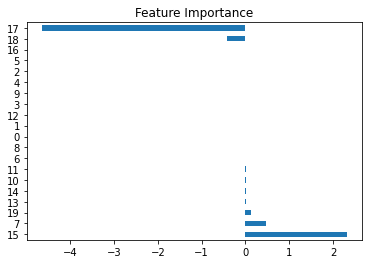

In [15]:
# biểu thị mức độ quan trọng của feature, cao nhất ứng vs quan trọng nhất 

importance = clf.coef_[0]
#importance is a list so you can plot it. 
feat_importances = pd.Series(importance)
feat_importances.nlargest(20).plot(kind='barh',title = 'Feature Importance')

*SVM

In [4]:
import numpy as np
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.svm import SVC
clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
model = clf.fit(x_train, y_train)
#clf.predict(X[:2, :])

#clf.predict_proba(X[:2, :])

y_pred = model.predict(x_test)
cm = confusion_matrix(y_test,y_pred)
print(cm)
print(classification_report(y_test,y_pred))
print(roc_auc_score(y_test,y_pred))
model.score(x_test, y_test)


[[23113  1343]
 [  233 29467]]
              precision    recall  f1-score   support

           0       0.99      0.95      0.97     24456
           1       0.96      0.99      0.97     29700

    accuracy                           0.97     54156
   macro avg       0.97      0.97      0.97     54156
weighted avg       0.97      0.97      0.97     54156

0.968619966429093


0.9708988847034493

In [5]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.95      0.97     24456
           1       0.96      0.99      0.97     29700

    accuracy                           0.97     54156
   macro avg       0.97      0.97      0.97     54156
weighted avg       0.97      0.97      0.97     54156



KNN

In [6]:
from sklearn.neighbors import KNeighborsClassifier
# Create a KNN classifier object
knn = KNeighborsClassifier(n_neighbors=30)  # Specify the number of neighbors (K)

# Train the classifier
knn.fit(x_train, y_train)

# Make predictions on the test set
y_pred = knn.predict(x_test)

from sklearn.metrics import accuracy_score
# Evaluate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.6362360587931162


In [7]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.59      0.67      0.62     24456
           1       0.69      0.61      0.65     29700

    accuracy                           0.64     54156
   macro avg       0.64      0.64      0.64     54156
weighted avg       0.64      0.64      0.64     54156



Linear Discriminant Analysis (LDA)

In [55]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Assuming you have your data in X (features) and y (labels)
# Split the data into training and testing sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an LDA classifier object
lda = LinearDiscriminantAnalysis()

# Fit the LDA model on the training data
lda.fit(x_train, y_train)

# Make predictions on the test set
y_pred = lda.predict(x_test)

# Evaluate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
y_pred = model.predict(x_test)
cm = confusion_matrix(y_test,y_pred)
print(cm)
print(classification_report(y_test,y_pred))
print(roc_auc_score(y_test,y_pred))
#model.score(x_train, y_train)

Accuracy: 0.589607799689785
[[18993  1262]
 [  824 24051]]
              precision    recall  f1-score   support

           0       0.96      0.94      0.95     20255
           1       0.95      0.97      0.96     24875

    accuracy                           0.95     45130
   macro avg       0.95      0.95      0.95     45130
weighted avg       0.95      0.95      0.95     45130

0.9522843841523093
